In [1]:
import os
import sys

seed = 0
os.environ['PYTHONHASSEED'] = str(seed)

In [2]:
import numpy as np
import pandas as pd
import time
import random

from tensorflow.random import set_seed

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import load_model

In [3]:
# Add modules path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from src.data_reader import DataReader
from src.metrics import compute_evaluation_metrics
from src.model_evaluation import evaluate_mlp, evaluate_mlp_multiple_splits
from src.plotting import plot_loss_curves
from src.save_object import load_object

In [5]:
# Set seed
random.seed(seed)
np.random.seed(seed)
set_seed(seed)

In [6]:
# Set input and output paths
filename = '../data/N-CMAPSS_DS02-006.h5'
output_path = '../results/experiment_set_15'

if not os.path.exists(output_path):
    os.makedirs(output_path)

In [7]:
data_reader = DataReader()

start_time = time.process_time()  
data_reader.load_dataset(filename, load_train=False, load_test=True)
print("Operation time (sec): " , (time.process_time() - start_time))

if data_reader.train_set is not None:
    print("Train set shape: " + str(data_reader.train_set.shape))
    
if data_reader.test_set is not None:   
    print("Test set shape: " + str(data_reader.test_set.shape))

Operation time (sec):  0.65625
Test set shape: (1253743, 47)


In [8]:
test_set = data_reader.test_set

In [9]:
test_set = test_set[test_set['unit'] != 14]

In [10]:
y_test = test_set['RUL']
x_test = test_set.drop(['RUL'], axis=1)

In [11]:
selected_columns = data_reader.column_names.w_cols + data_reader.column_names.x_s_cols
x_test = x_test[selected_columns]

In [12]:
x_test = x_test.astype(np.float32)
y_test = y_test.astype(np.float32)

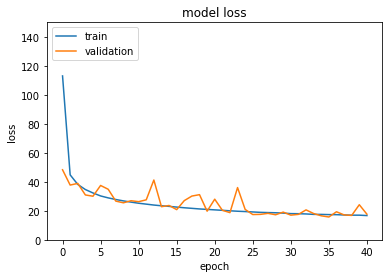

Test set:
MSE: 71.22
RMSE: 8.44
CMAPSS score: 1.84



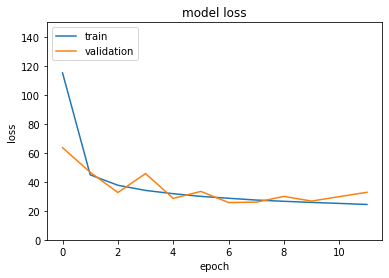

Test set:
MSE: 59.88
RMSE: 7.74
CMAPSS score: 1.74



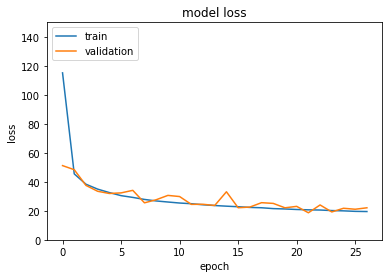

Test set:
MSE: 73.45
RMSE: 8.57
CMAPSS score: 1.87

MSE: mean=68.18 stddev=5.94
RMSE: mean=8.25 stddev=0.37
CMAPSS: mean=1.82 stddev=0.05


In [13]:
NUM_TRIALS = 3
TRAIN_RESULTS_PATH = r"../results/experiment_set_15_1/results_no_filtering_final/"

results = evaluate_mlp_multiple_splits(x_test, y_test, NUM_TRIALS, TRAIN_RESULTS_PATH, plot_loss=True)

In [ ]:
NUM_TRIALS = 3
TRAIN_RESULTS_PATH = r"../results/experiment_set_15_1/results_filtered_final/"

results = evaluate_mlp_multiple_splits(x_test, y_test, NUM_TRIALS, TRAIN_RESULTS_PATH, plot_loss=True)